In [15]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/vincenzorrei/EDU-Datasets/refs/heads/main/QualityOfLife.csv')
df.head()

,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category
0,Afghanistan,32.15,'Very Low',25.33,'Low',24.24,'Low',0.00,NaN,21.08,'Very Low',7.8,'Low',56.17,'Very High',84.44,'Very High',0.0,NaN
1,Aland Islands,125.01,'Very High',71.81,'High',79.72,'High',0.00,NaN,53.44,'Low',5.33,'Low',19.05,'Very Low',18.05,'Very Low',0.0,NaN
2,Albania,42.82,'Low',55.52,'Moderate',48.21,'Moderate',86.43,'Very High',40.85,'Low',14.88,'High',36.74,'Moderate',77.25,'High',': 104.16','Low'
3,Alderney,0.00,NaN,83.79,'Very High',100.00,'Very High',0.00,NaN,0.00,NaN,0.0,NaN,5.00,'Very Low',1.72,'Very Low',0.0,NaN
4,Algeria,27.60,'Very Low',47.54,'Moderate',54.43,'Moderate',94.82,'Very High',25.31,'Very Low',21.7,'Very High',45.09,'High',63.87,'High',': 98.83','Very Low'


In [16]:
df.columns

Index(['country', 'Purchasing Power Value', 'Purchasing Power Category',
       'Safety Value', 'Safety Category', 'Health Care Value',
       'Health Care Category', 'Climate Value', 'Climate Category',
       'Cost of Living Value', 'Cost of Living Category',
       'Property Price to Income Value', 'Property Price to Income Category',
       'Traffic Commute Time Value', 'Traffic Commute Time Category',
       'Pollution Value', 'Pollution Category', 'Quality of Life Value',
       'Quality of Life Category'],
      dtype='object')

In [17]:
df_sorted = df.sort_values(by='Quality of Life Value', ascending=True)
df_sorted.head()

,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category
176,Rwanda,20.50,'Very Low',72.81,'High',72.87,'High',99.74,'Very High',37.05,'Very Low',446.83,'Very High',15.67,'Very Low',39.22,'Low',': 0.00','Very Low'
208,Tanzania,23.52,'Very Low',46.46,'Moderate',42.14,'Moderate',71.28,'High',25.31,'Very Low',134.04,'Very High',27.79,'Low',62.48,'High',': 0.00','Very Low'
219,Uganda,10.33,'Very Low',45.88,'Moderate',50.05,'Moderate',98.41,'Very High',47.97,'Low',"'1,075.92'",'Very High',44.50,'High',84.05,'Very High',': 0.00','Very Low'
110,Kenya,35.60,'Very Low',44.24,'Moderate',61.54,'High',99.79,'Very High',28.23,'Very Low',18.77,'Very High',50.59,'High',69.04,'High',': 101.33','Low'
160,Pakistan,30.57,'Very Low',56.31,'Moderate',59.38,'Moderate',71.93,'High',17.90,'Very Low',14.3,'High',38.01,'Moderate',73.31,'High',': 104.14','Low'


In [18]:
# Rimuovere ": " e altri caratteri non numerici dalla colonna "Quality of Life Value"
df['Value Enc'] = df['Quality of Life Value'].astype(str).str.replace(': ', '', regex=False)
df['Value Enc'] = df['Value Enc'].astype(str).str.replace("'", '', regex=False)
print(df['Value Enc'])


0         0.0
1         0.0
2      104.16
3         0.0
4       98.83
        ...  
231       0.0
232       0.0
233       0.0
234       0.0
235     94.20
Name: Value Enc, Length: 236, dtype: object


In [19]:
# Identificare i valori non convertibili in numerico nella colonna "Quality of Life Value"
non_convertible_values = df[df['Value Enc'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()]
print(non_convertible_values['Quality of Life Value'])

Series([], Name: Quality of Life Value, dtype: object)


In [20]:
df['Value Enc'] = pd.to_numeric(df['Value Enc'], errors='coerce')

In [21]:
# Rimuovere ": " e altri caratteri non numerici dalla colonna "Quality of Life Value"
df['Property P'] = df['Property Price to Income Value'].astype(str).str.replace(': ', '', regex=False)
df['Property P'] = df['Property P'].astype(str).str.replace("'", '', regex=False)
df['Property P'] = df['Property P'].astype(str).str.replace(",", '', regex=False)
print(df['Property P'])


0        7.8
1       5.33
2      14.88
3        0.0
4       21.7
       ...  
231      0.0
232    12.75
233    15.98
234    72.42
235    17.35
Name: Property P, Length: 236, dtype: object


In [22]:
# Identificare i valori non convertibili in numerico nella colonna "Quality of Life Value"
non_convertible_values = df[df['Property P'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()]
print(non_convertible_values['Property Price to Income Value'])

Series([], Name: Property Price to Income Value, dtype: object)


In [23]:
df['Property P'] = pd.to_numeric(df['Property P'], errors='coerce')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            236 non-null    object 
 1   Purchasing Power Value             236 non-null    float64
 2   Purchasing Power Category          190 non-null    object 
 3   Safety Value                       236 non-null    float64
 4   Safety Category                    234 non-null    object 
 5   Health Care Value                  236 non-null    float64
 6   Health Care Category               221 non-null    object 
 7   Climate Value                      236 non-null    float64
 8   Climate Category                   114 non-null    object 
 9   Cost of Living Value               236 non-null    float64
 10  Cost of Living Category            191 non-null    object 
 11  Property Price to Income Value     236 non-null    object 

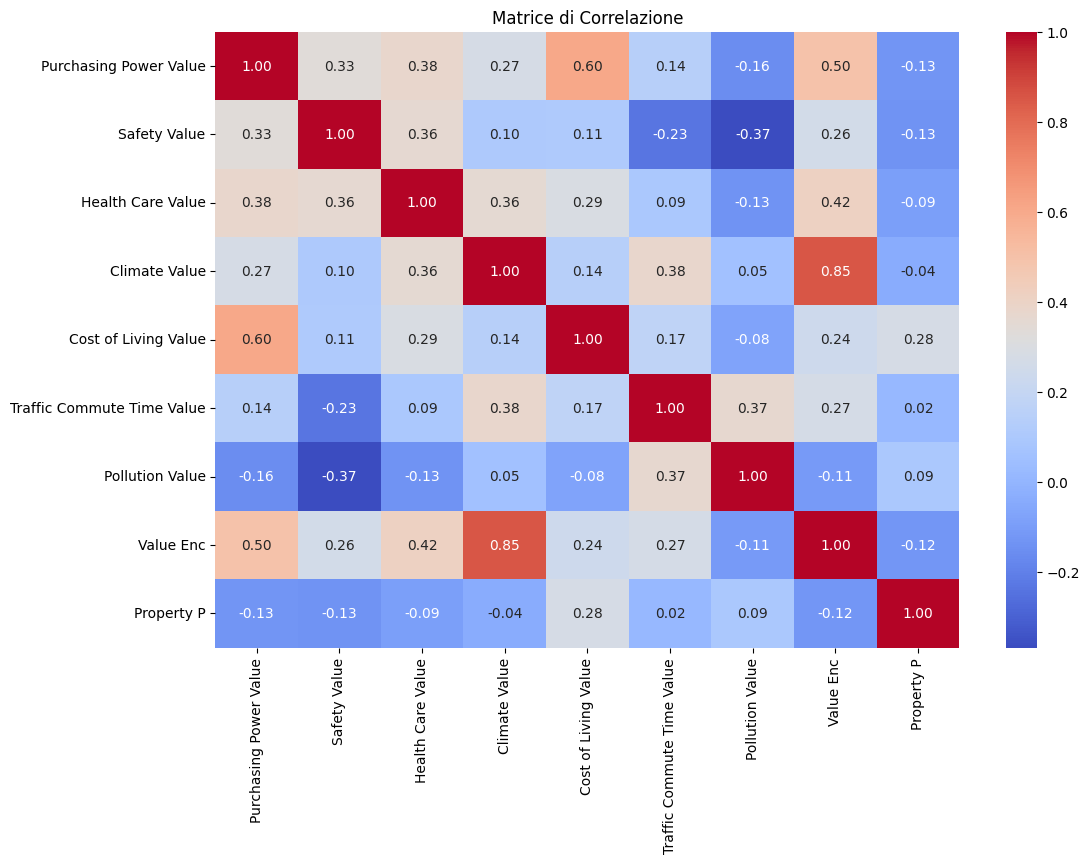

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola la matrice di correlazione
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Visualizza la matrice di correlazione con seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di Correlazione')
plt.show()